# **GROUP 8 - Solutions to P02**

**Students:**
- Marek Majoch, <s13mmajo@uni-bonn.de>, M.Sc Astrophysics
- Yanhanle Lauryn Zhao, <s19yzhao@uni-bonn.de>, M.Sc Astrophysics
- Diana Victoria Lopez Navarro, <s09dlope@uni-bonn.de>, M.Sc Astrophysics
- Rutul Kumar,  , M.Sc Astrophysics

**Deadline:** 31. Oct 2024, 13:00 
_______________________________________________________


In [328]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# P03: Point Processes

## Problem 1: Mean and variance of Gaussian random variable

Let us simulate the experiment of measuring a Gaussian random variable with $\mu=0$ and standard deviation $\sigma=1$. Each experiment is a draw from a standard normal.

(i) Simulate 10 repetitions of this experiment by drawing $n_{\mathrm{samp}}=10$ samples from this distribution.


(ii) Use `numpy` routines to estimate the mean and the variance of the samples. For the variance, use the trivial but biased estimator as well as the unbiased one.

In [329]:
def sampling(mu,sigma,n):
    samples = np.random.normal(mu, sigma, n)
    return samples

def plotting(function,n, n_bin):
    fig, ax =  plt.subplots(figsize=(6, 4))
    ax.hist(function, bins=n_bin, color ='b',  alpha=0.7, range=(-8,8), density = True)
    ax.set_title(str(names[0])+' , n=%i' %n)
    ax.set_xlabel('Position')
    ax.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [330]:
mu, sigma = 0, 1 # mean and standard deviation
n = [10]*10 #[number of samples]*number of experiments

In [331]:
#Samples
samples_10 = np.array([])
a=1
mean_10, var_10, uvar_10=np.array([]), np.array([]), np.array([])
for i in n:
    names =['Y'+str(a)]
    sample = sampling(mu,sigma,i)
    #plot=plotting(sample, i,25)
    samples_10 = np.append(samples, sample.copy())
    mean_10= np.append(mean, np.mean(sample))
    var_10= np.append(var, np.var(sample))
    uvar_10= np.append(uvar, np.var(sample, ddof=1))
    a=a+1


## Problem 2: Distribution of sample mean

Write a function that repeats problem 1 $n$ times.

(i) Using these samples, investigate the distribution of the sample mean. How does it compare to your expectations? How do your conclusions change if you increase the sample size to $n_{\mathrm{samp}}=100$?


In [332]:
#     Sample n experiments with m number of samples.
#     Args:
#     mu : mean
#     sigma : standard deviation
#     n : number of experiments, is a list with len(number of experiments) and content #of samples m e.g [10, 100,1000] 
    
#     Returns:
#         (:obj:`integer`, `float` or `array`): samples, mean, biased und unbiased var.
def sampling_experiments(n,mu,sigma):
    samples = []
    mean, var, uvar= [],[],[]
    
    for i in range(len(n)):
        sample = sampling(mu,sigma,int(n[i]))
        samples.append(sample.copy())
        mean.append(np.mean(sample))
        var.append( np.var(sample))
        uvar.append(np.var(sample, ddof=1))

    return samples, mean, var, uvar

In [333]:
n100 = [100]*10 #[number of samples]*number of experiments
samples_100, means_100, vars_biased_100, vars_unbiased_100  = sampling_experiments(n100,mu,sigma)
print(means_100)

n1000= [1000]*10 #[number of samples]*number of experiments
samples_1000, means_1000, vars_biased_1000, vars_unbiased_1000  = sampling_experiments(n1000,mu,sigma)
print(means_1000)

n10000 = [10000]*10 #[number of samples]*number of experiments
samples_10000, means_10000, vars_biased_10000, vars_unbiased_10000  = sampling_experiments(n10000,mu,sigma)
print(means_1000)

[-0.016331303098424715, -0.02358528016360898, 0.04446407003947695, 0.08053339573885633, -0.0863652149239602, -0.08595146119929, 0.055753207946687144, -0.02605956142776259, -0.037333828579673954, 0.009672161161782695]
[-0.012634226044917003, 0.00863113579319797, -0.002113383813032254, -0.0074712045617758805, -0.0481743707564043, -0.010017003159233895, -0.04332636836463504, -0.017358116349974587, 0.06516177789221807, 0.013089473563270256]
[-0.012634226044917003, 0.00863113579319797, -0.002113383813032254, -0.0074712045617758805, -0.0481743707564043, -0.010017003159233895, -0.04332636836463504, -0.017358116349974587, 0.06516177789221807, 0.013089473563270256]


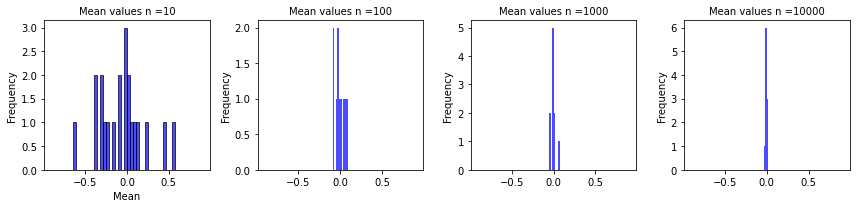

In [334]:
fig, axh = plt.subplots(ncols=4, figsize=(12, 3))
axh[0].hist(mean_10, bins=50, color='blue', alpha=0.7, edgecolor='black', range=(-0.9, 0.9))
axh[0].set_title('Mean values n =10', fontsize=10)
axh[0].set_xlabel('Mean')
axh[0].set_ylabel('Frequency')

axh[1].hist(means_100, bins=100, color ='b', alpha=0.7, range=(-0.9, 0.9))
axh[1].set_title('Mean values n =100', fontsize=10)
axh[0].set_xlabel('Mean')
axh[1].set_ylabel('Frequency')

axh[2].hist(means_1000, bins=100, color ='b', alpha=0.7, range=(-0.9, 0.9))
axh[2].set_title('Mean values n =1000', fontsize=10)
axh[0].set_xlabel('Mean')
axh[2].set_ylabel('Frequency')

axh[3].hist(means_10000, bins=100, color ='b', alpha=0.7, range=(-0.9, 0.9))
axh[3].set_title('Mean values n =10000', fontsize=10)
axh[0].set_xlabel('Mean')
axh[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

(ii) Using these samples, investigate the bias of the variance estimators. How does it compare to your expectations? How do your conclusions change if you increase the sample size to $n_{\mathrm{samp}}=100$?

## Problem 3: Analyzing samples

Load `sample1.out` from the `data` directory into your notebook. Inspect the distribution of the sample by plotting a histogram. 

(i) Write a class that is able to estimate mean and variance as well as error on the mean and bias of the variance. Make the choice of the variance estimator an argument of the class' `__init__` function.

(ii) Use your class to estimate mean and variance of `sample1.out`. In addition, also estimate the median and plot them on top of your histogram.

(iii) Now also estimate the mean and variance of the remaining samples in the `data` directory. Are the samples consistent with being drawn from the same underlying distribution? If yes, investigate the distribution of the sample means and compare to your expectations.

## Problem 4: The Poisson distribution

Let us assume we have a process in which the probability of a given event, $p$, is small but we perform a large number of trials $N$. We further assume that the so-called rate of this process (or mean number of ocurring events), $\lambda=Np$, is finite and constant. Then the probability of $k$ events occurring follows a Poisson distribution given by $$P(k|\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}.$$ So the Poisson distribution describes the distributions of events, where each single one is rare but we perform a large number of trials in order to keep $\lambda$ constant. An example for this is the number of photons reaching a telescope.

One of the earliest application of Poisson processes was the probability of Prussian soldiers being kicked to death by horses. This problem was analyzed by Ladislaus Bortkiewicz in 1898. Analyzing 10 Prussian corps for 20 years he collected the following data:

| Number of deaths | Number of groups |
|:---| :--- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

(i) Plot the probability distribution of these data.

(ii) Compare to the theoretical prediction using Poisson statistics.